# Title: Personalized Medical Recommendation System with Machine Learning

# Description:

Welcome to our cutting-edge Personalized Medical Recommendation System, a powerful platform designed to assist users in understanding and managing their health. Leveraging the capabilities of machine learning, our system analyzes user-input symptoms to predict potential diseases accurately.

# load dataset & tools

In [1]:
import  pandas as pd

In [2]:
dataset = pd.read_csv('Training.csv')

In [3]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [8]:
vals = dataset.values.flatten()

In [9]:
vals

array([1, 1, 1, ..., 1, 1, 'Impetigo'], dtype=object)

In [5]:
dataset.shape

(4920, 133)

In [13]:
dataset['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

# train test split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

# Training top models

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear', probability=True),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB(),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42,verbose=-1),
    'LogisticRegression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")


SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


KNeighbors Accuracy: 1.0
KNeighbors Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ..

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


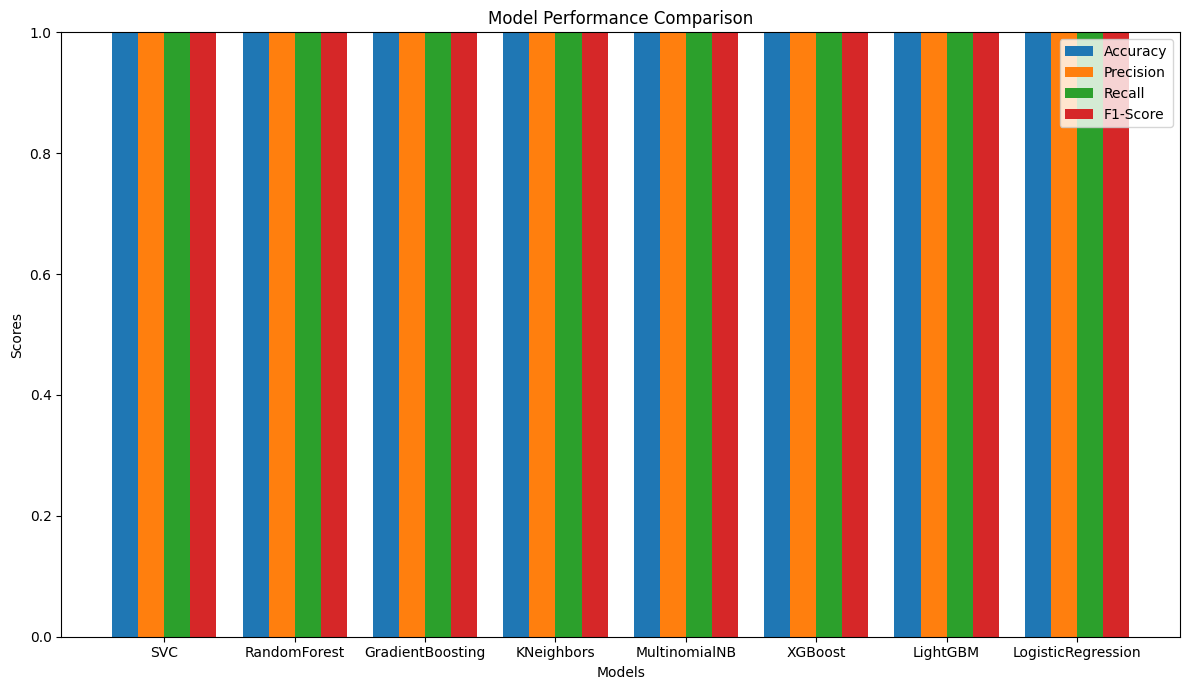

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have X, y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}
model_names = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_names.append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    metrics['F1-Score'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.2
index = range(len(model_names))

# Plot each metric
ax.bar([i - 1.5*bar_width for i in index], metrics['Accuracy'], bar_width, label='Accuracy')
ax.bar([i - 0.5*bar_width for i in index], metrics['Precision'], bar_width, label='Precision')
ax.bar([i + 0.5*bar_width for i in index], metrics['Recall'], bar_width, label='Recall')
ax.bar([i + 1.5*bar_width for i in index], metrics['F1-Score'], bar_width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1)
ax.legend()

plt.tight_layout()
plt.show()


# single prediction

In [17]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [114]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [115]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [116]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


C:\Users\naimat\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [117]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [39]
Actual Disease : 39


C:\Users\naimat\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Recommendation System and Prediction

# load database and use logic for recommendations

In [118]:
sym_des = pd.read_csv("symtoms_df.csv")
precautions = pd.read_csv("precautions_df.csv")
workout = pd.read_csv("workout_df.csv")
description = pd.read_csv("description.csv")
medications = pd.read_csv('medications.csv')
diets = pd.read_csv("diets.csv")

In [119]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [121]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms.......itching,skin_rash,nodal_skin_eruptions
=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================medications==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


C:\Users\naimat\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [122]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms.......yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
=================predicted disease============
Impetigo
=================description==================
Impetigo is a highly contagious skin infection causing red sores that can break open.
=================precautions==================
1 :  soak affected area in warm water
2 :  use antibiotics
3 :  remove scabs with wet compressed cloth
4 :  consult doctor
=================medications==================
5 :  ['Topical antibiotics', 'Oral antibiotics', 'Antiseptics', 'Ointments', 'Warm compresses']
=================workout==================
6 :  Maintain good hygiene
7 :  Stay hydrated
8 :  Consume nutrient-rich foods
9 :  Limit sugary foods and beverages
10 :  Include foods rich in vitamin C
11 :  Consult a healthcare professional
12 :  Follow medical recommendations
13 :  Avoid scratching
14 :  Take prescribed antibiotics
15 :  Practice wound care
=================diets=====

C:\Users\naimat\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [123]:
# let's use pycharm flask app
# but install this version in pycharm
import sklearn
print(sklearn.__version__)

1.3.2
